**Supervised learning** refers to algorithms that learn to map x to y or input to output mapping. The key characteristic of supervised learning algorithms is that we give examples to learn from. 
Example:

        Input(X)          Output(Y)           Application
     1. Email             Spam ?(0/1)         Spam filtering
     2. Audio             Text transcripts    Speech recognition
     3. English           Spanish             Machine Translation
     4. Ad/user info      Click? (0/1)        Online advertising
     5. image, radar info other cars position Self driving car
     
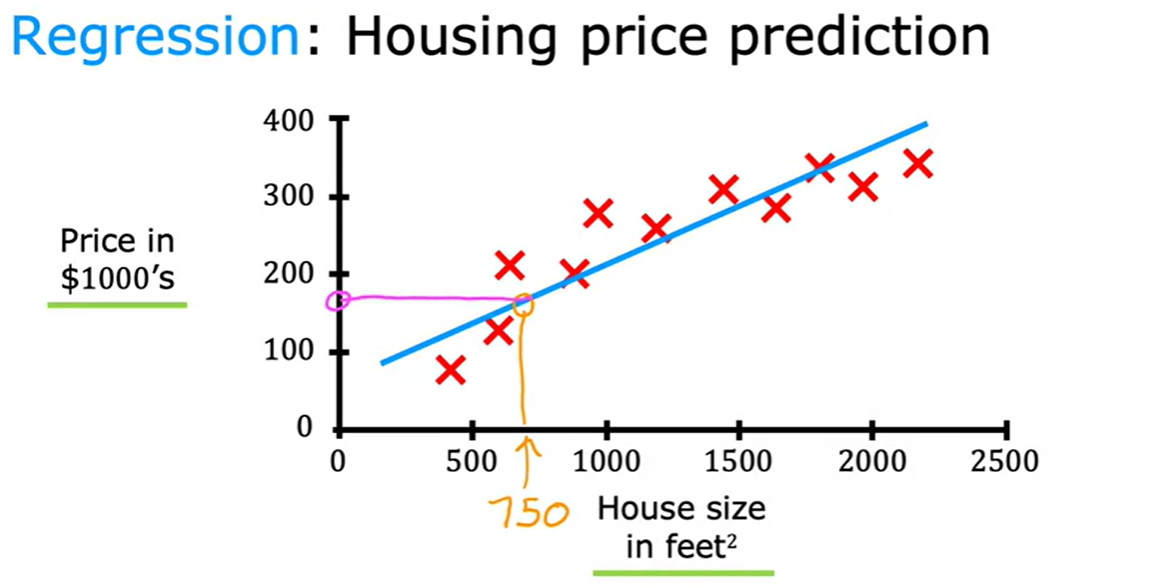
  
 Say if we want to predict housing prices based on the size of the house. We've collected some data and plotted the data and it looks like this. Here on the horizontal axis is the size of the house in square feet and on the vertical axis is the price of the house in, thousands of dollars. With this data, we can predict the price of 750 square foot house by fitting the straight line and reading off the value on y-axis.
 
**Regression algorithm** is a type of supervised learning algorithm learns to predict numbers out of infinitely many possible numbers.

**Classification**: Breast cancer detection

There's a second major type of supervised learning algorithm called a classification algorithm. Take breast cancer detection as an example of a classification problem. Say we're building a machine learning system so that doctors can have a diagnostic tool to detect breast cancer. Using a patient's medical records the machine learning system tries to figure out if a tumor that is a lump is malignant or benign. One reason that this is different from regression is that we're trying to predict only a small number of possible outputs or categories. In this case two possible outputs 0 or 1, benign or malignant. 

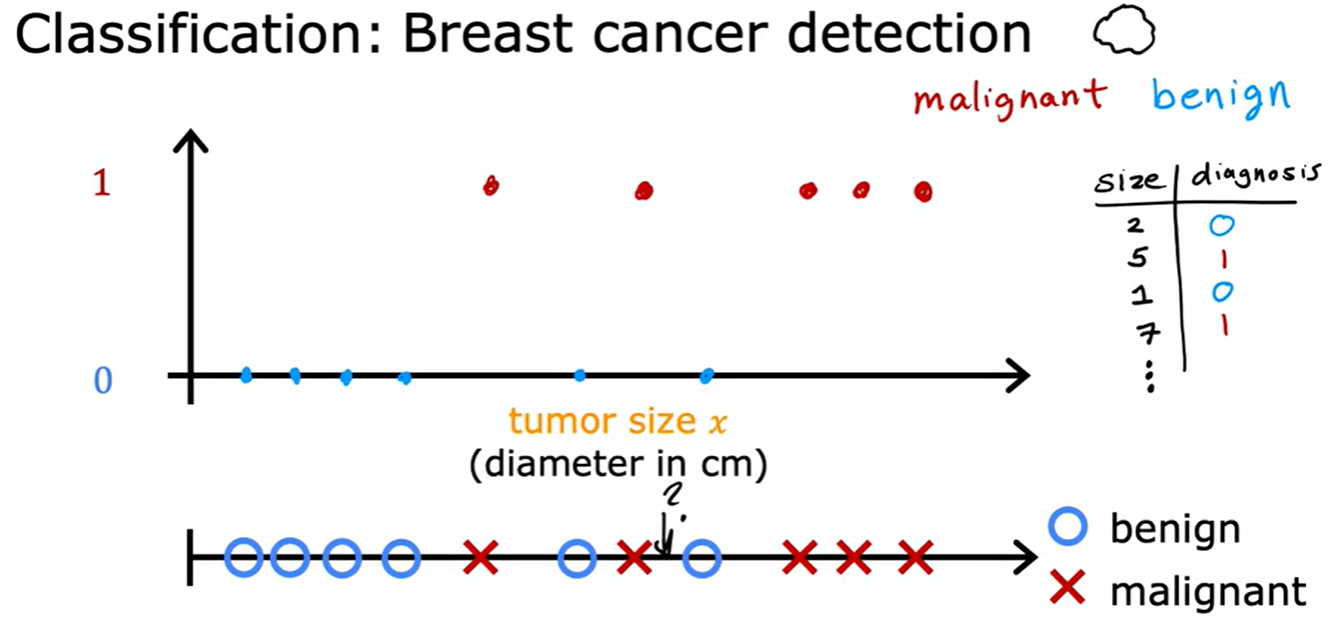

In classification problems we can also have more than two possible output categories. Maybe the breast cancer learning algorithm can output multiple types of cancer diagnosis if it turns out to be malignant like malignant type 1 and type 2. In this case the average would have three possible output categories it could predict.

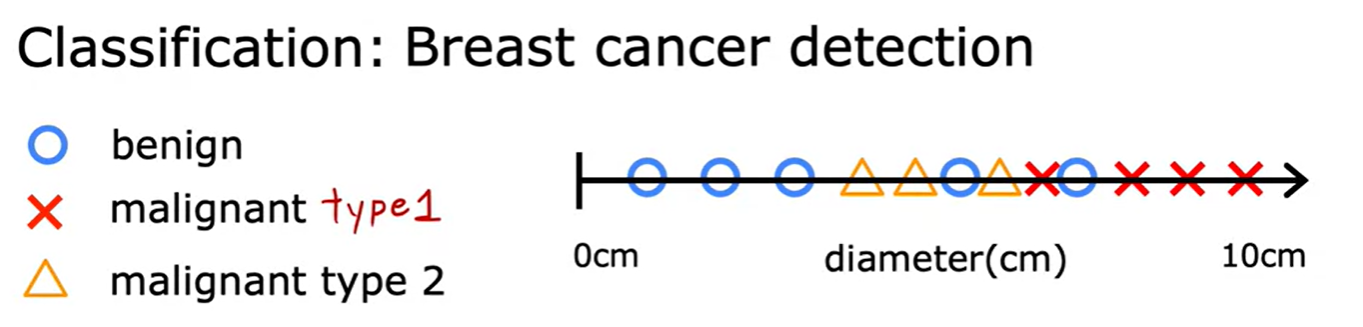

So to summarize classification algorithms predict categories. Categories don't have to be numbers. It could be non numeric for example, it can predict whether a picture is that of a cat or a dog. And it can predict if a tumor is benign or malignant. Categories can also be numbers like 0, 1 or 0, 1, 2. But what makes classification different from regression when we're interpreting the numbers is that classification predicts a small finite limited set of possible output categories such as 0, 1 and 2 but not all possible numbers in between like 0.5 or 1.7. 

**Unsupervised Learning**

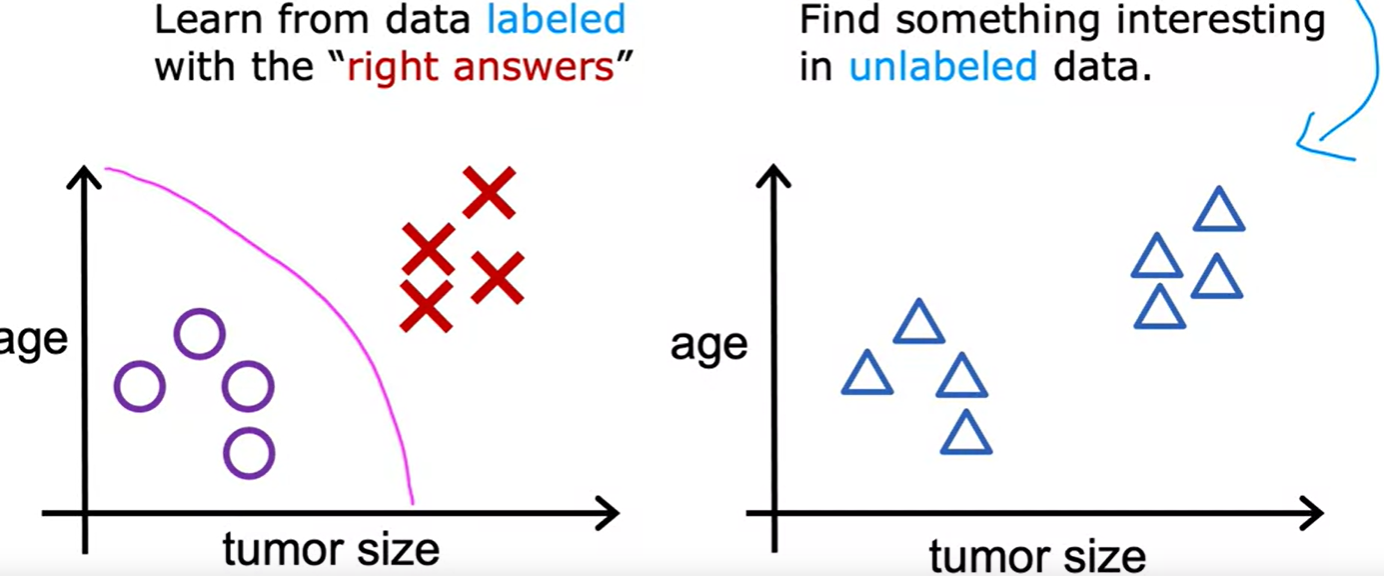

If the given data isn't associated with any output labels y, say we're given data on patients: their tumor size and the patient's age. But not whether the tumor was benign or malignant, so the dataset looks like on the right. We're not asked to diagnose whether the tumor is benign or malignant, because we're not given any labels. Instead, our job is to find some structure or some pattern or just find something interesting in the data.

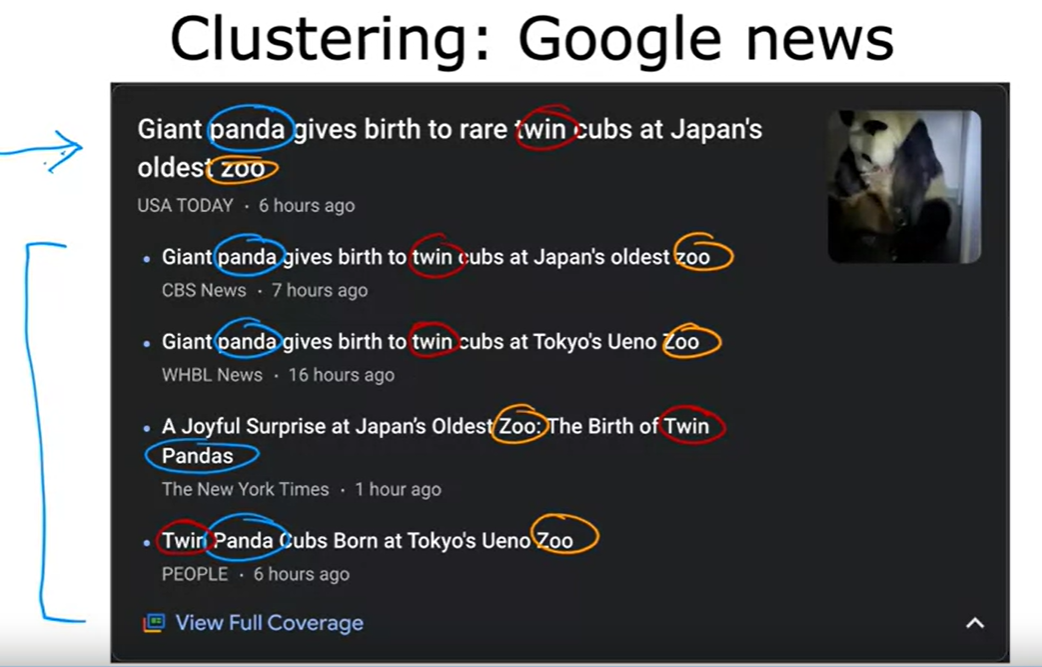

Clustering algorithm is a particular type of unsupervised learning as it places the unlabeled data, into different clusters and this turns out to be used in many applications. For example, clustering is used in google news. The algorithm has to figure out on his own without supervision, what are the clusters of news articles today. 

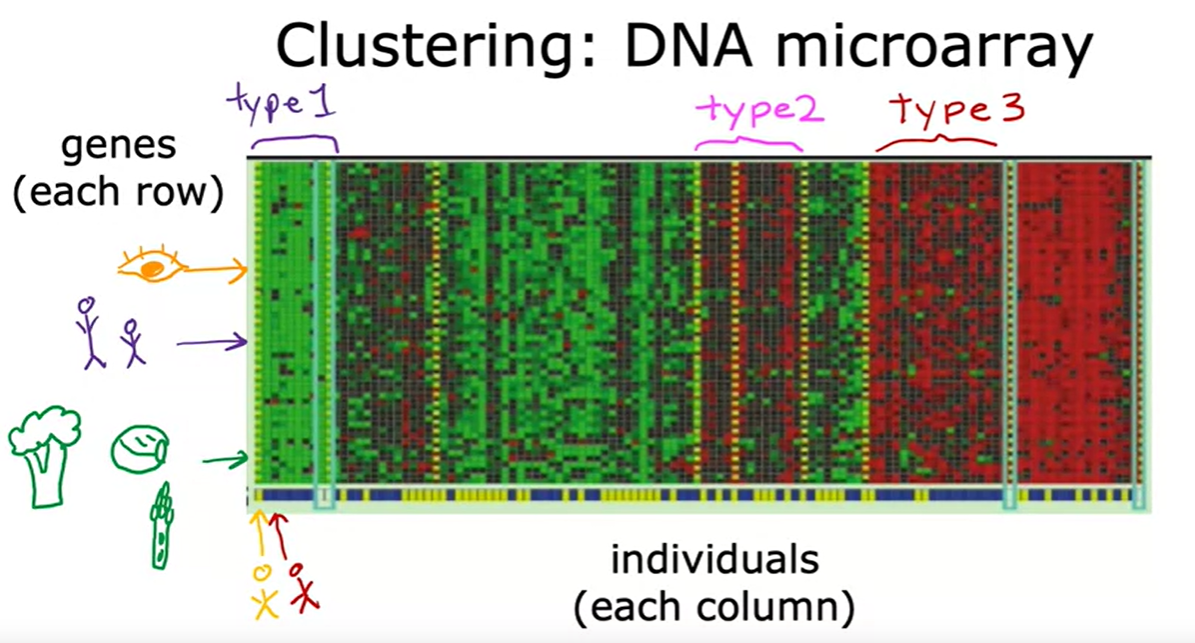

The second example of unsupervised learning is clustering of genetic or DNA data. The image shows a picture of DNA micro array data, that look like tiny grids of a spreadsheet. And each tiny column represents the genetic or DNA activity of one person. The idea is to measure how much certain genes, are expressed for each individual person. So these colors red, green, gray, and so on, show the degree to which different individuals do, or do not have a specific gene active. We can run clustering algorithm on top of it to group individuals into different categories.

In supervised learning, the data comes with both inputs x and input labels y, whereas in unsupervised learning, the data comes only with inputs x but not output labels y, and the algorithm has to find some structure or some pattern or something interesting in the data. Apart from clsutering algorithm , two other types of unsupervised learning are anomaly detection and dimensionality reduction. Anomaly detection is used to detect unusual events and it's very important for fraud detection in the financial system, where unusual events, unusual transactions could be signs of fraud. Dimensonality reduction lets big data-set magically compressed to a much smaller data-set while losing as little information as possible.

Terminology and notation widely used in machine learning:

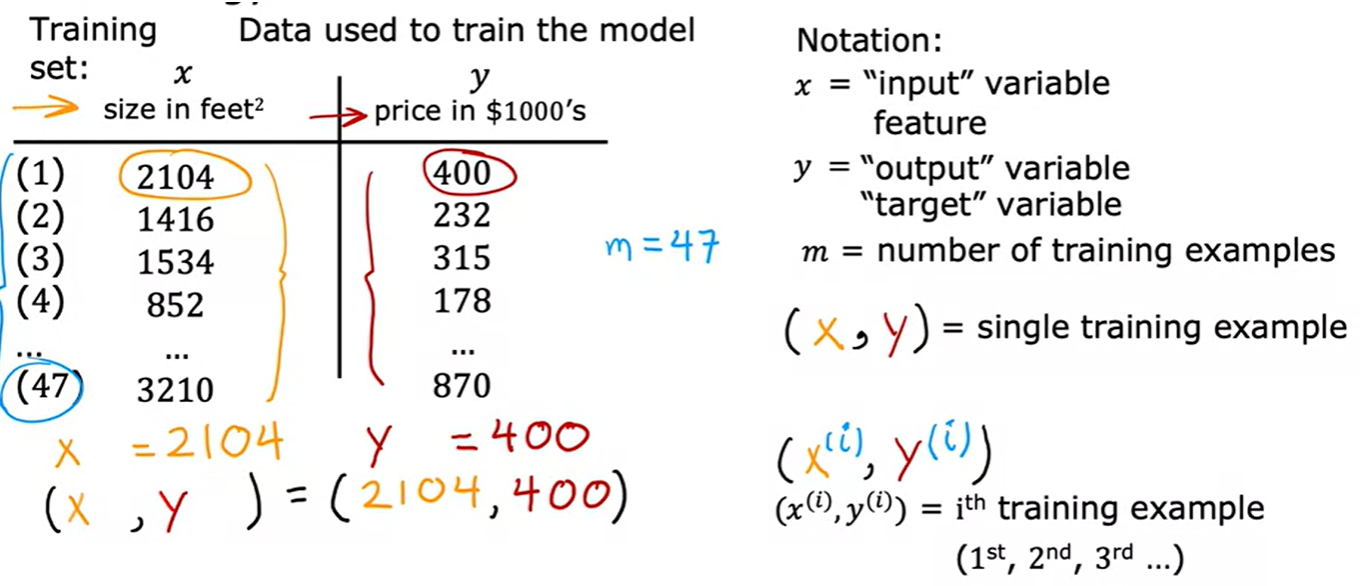

Process of how supervised learning works:

To train the model, we feed the training set, both the input features and the output targets to our learning algorithm. Then our supervised learning algorithm will produce some function, f. Historically, this function used to be called a hypothesis. The job with f is to take a new input x and output and estimate or a prediction, y-hat. In machine learning, the convention is that y-hat is the estimate or the prediction for y. The function f is called the model. X is called the input or the input feature, and the output of the model is the prediction, y-hat. When the symbol is just the letter y, then that refers to the target, which is the actual true value in the training set.

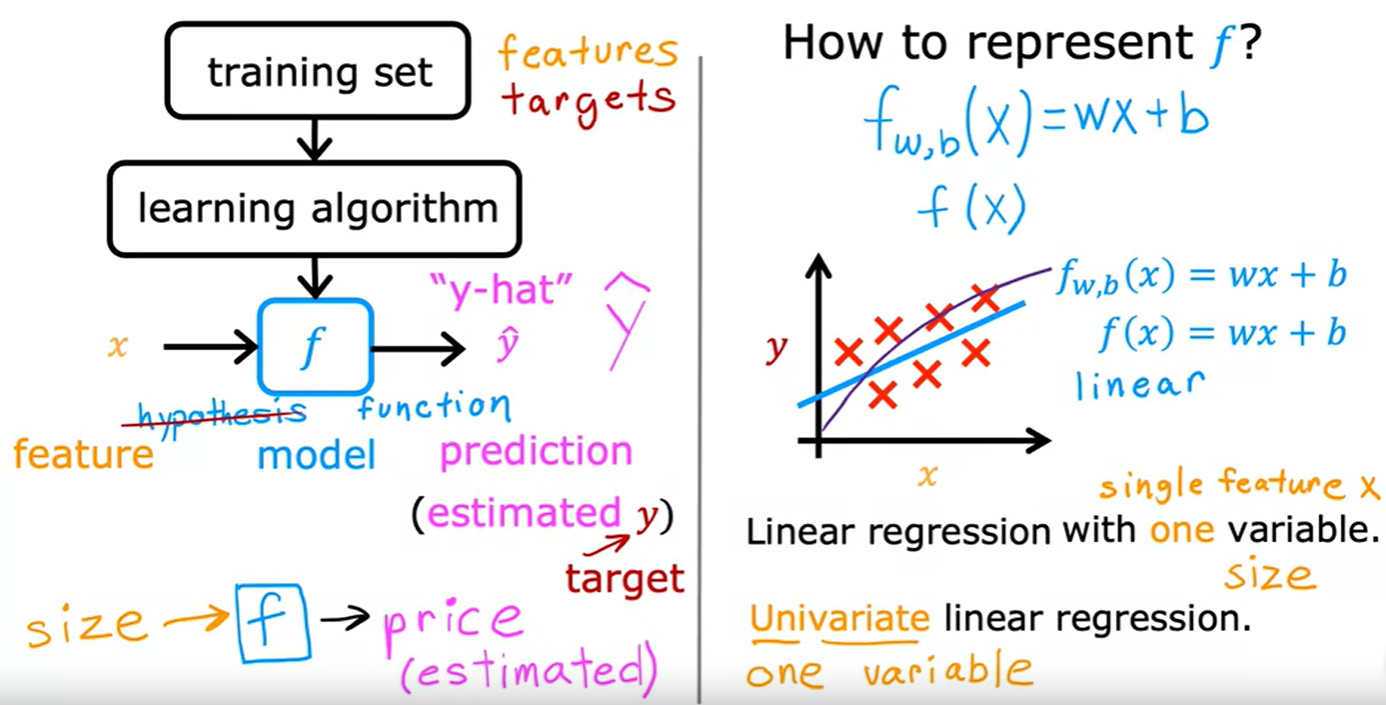


**Cost Function**

Suppose we want to fit a straight line to the training data, so we have the function, f(w, b)=w*x+b.

Here, the model's parameters are w, and b. Now, depending on the values chosen for these parameters, we get different straight lines. We want to find values for w, and b, so that the straight line fits the training data well. To measure how well a choice of w, and b fits the training data, we have a cost function J. What the cost function J does is, it measures the difference between the model's predictions, and the actual true values for y. 

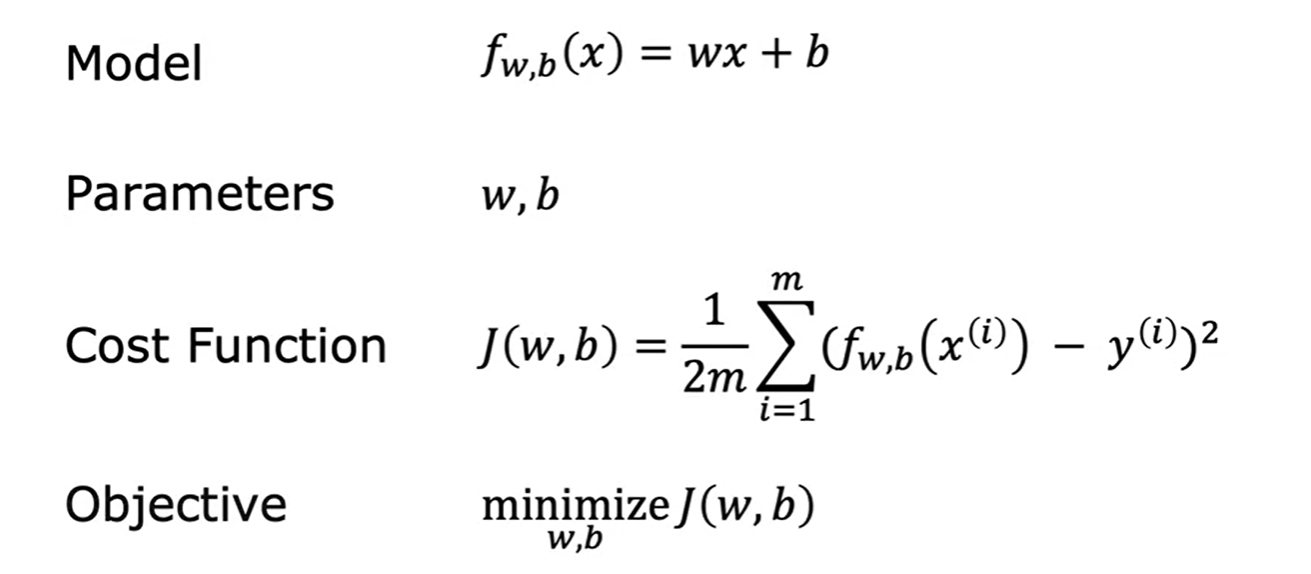


In [1]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

**Gradient Descent**

Gradient descent is an algorithm that we can use to try to minimize a function, not just a cost function for linear regression. 

Algorithm:

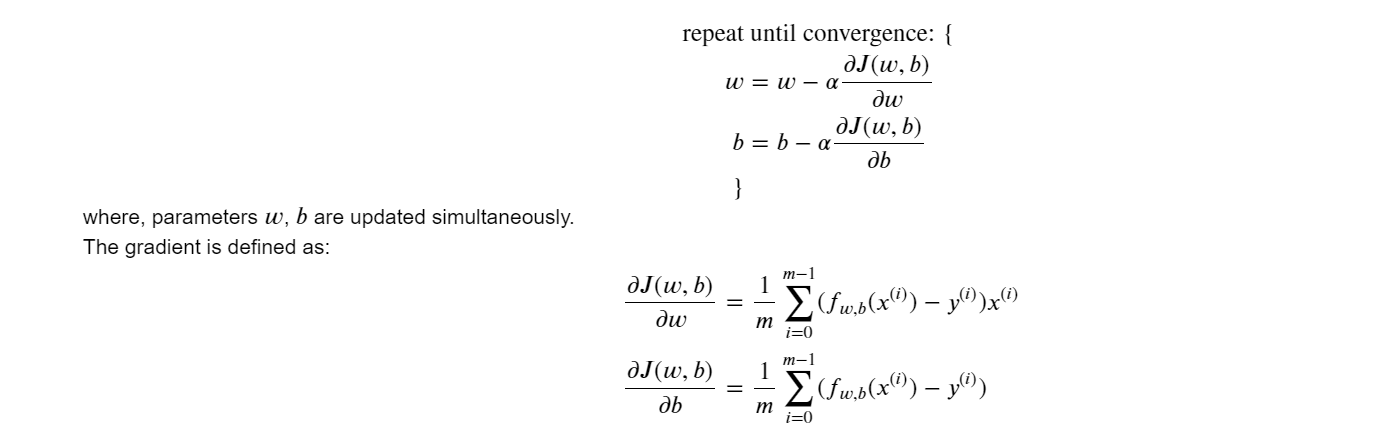

By converges, we mean the point at a local minimum where the parameters w and b no longer change much with each additional step.

The fact that the cost function squares the loss ensures that the 'error surface' is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions.

In [2]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration 
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
       
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In this equation, Alpha is called the learning rate. The learning rate is usually a small positive number between 0 and 1. What Alpha does is, it basically controls how big of a step we take downhill. If Alpha is very large, then that corresponds to a very aggressive gradient descent procedure where we're trying to take huge steps downhill. If Alpha is very small, then we'd be taking small baby steps downhill. 

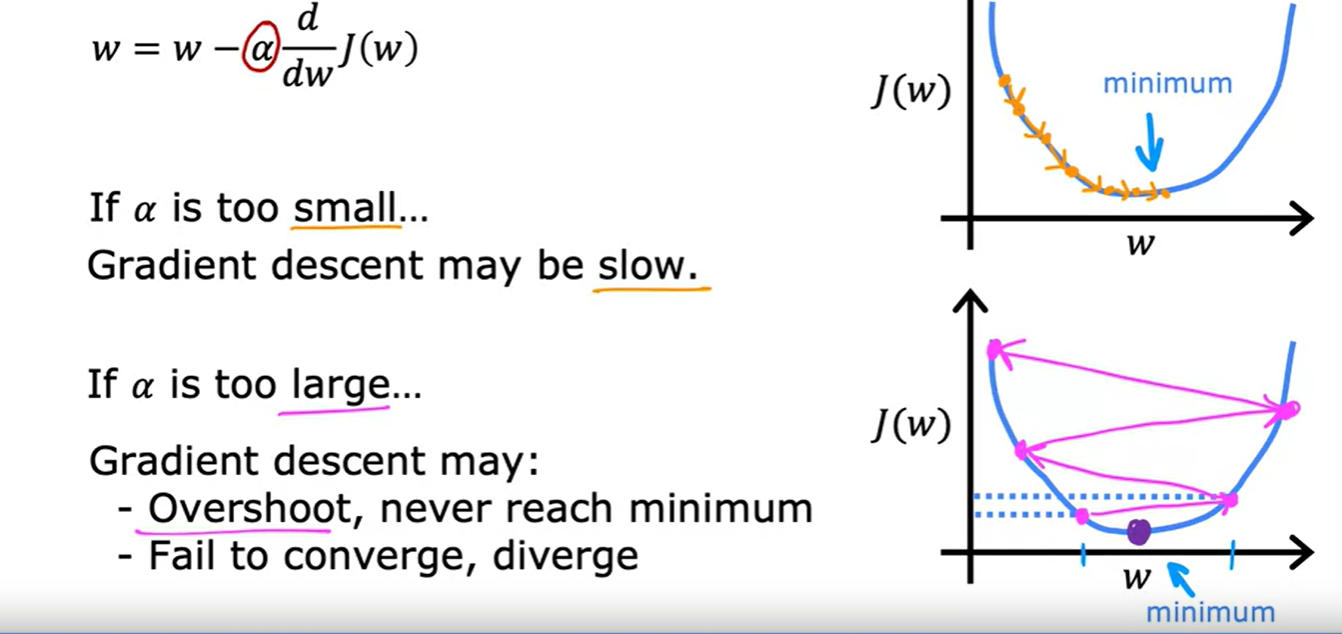

One important detail is that for gradient descent, we want to simultaneously update w and b, meaning we should update both parameters at the same time.

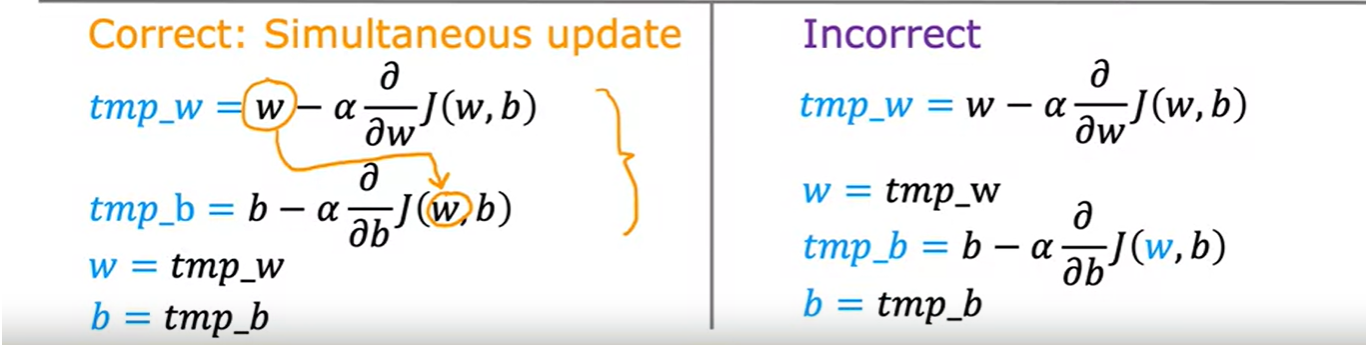

As we get nearer a local minimum, gradient descent will automatically take smaller steps. And that's because as we approach the local minimum, the derivative automatically gets smaller, that means the update steps also automatically gets smaller. Even if the learning rate alpha is kept at some fixed value. 

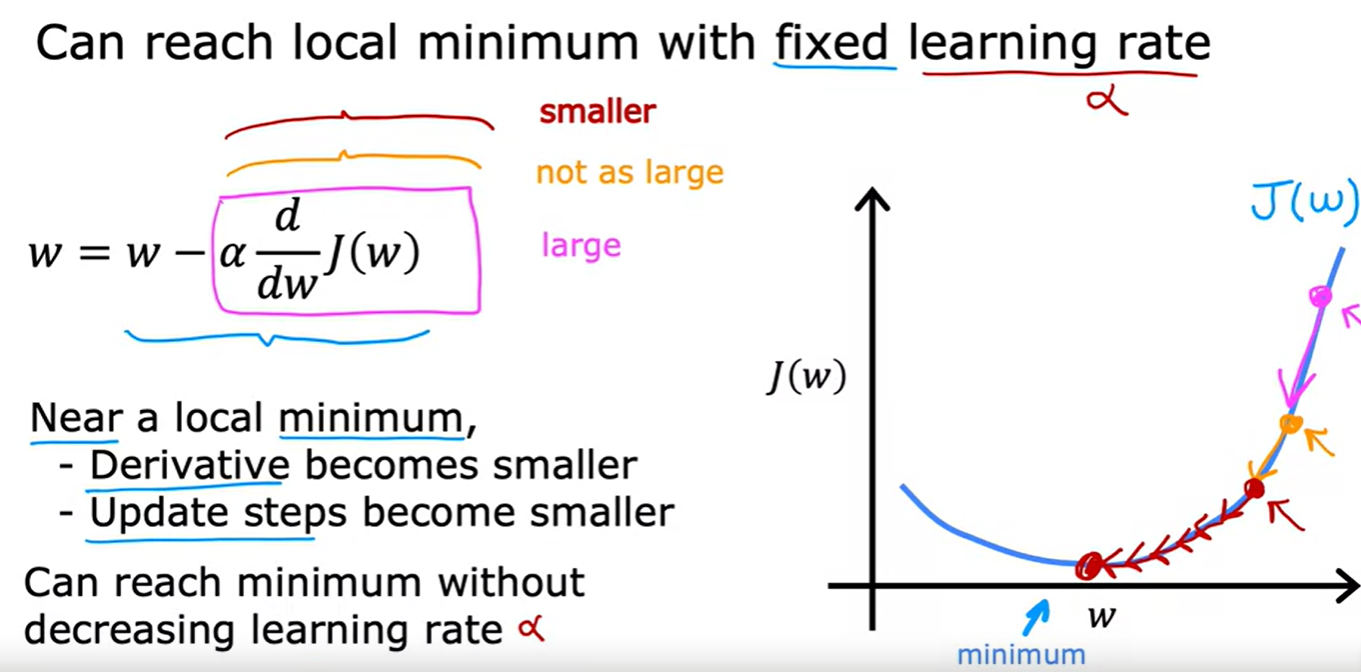

To be more precise, this gradient descent process is called batch gradient descent. The term batch grading descent refers to the fact that on every step of gradient descent, we're using all of the training examples, instead of just a subset of the training data.